In [1]:
ls -lrt /eos/user/a/arseksar/

total 194049
drwxr-xr-x. 2 arseksar 2766      4096 Jun 29 19:36 GNN/
-rw-r--r--. 1 arseksar 2766     12715 Jun 29 19:38 garnet.py
-rw-r--r--. 1 arseksar 2766      4019 Jun 29 19:38 garnet_script.py
-rw-r--r--. 1 arseksar 2766      3066 Jun 29 20:29 generatorGNN.py
-rw-r--r--. 1 arseksar 2766    122908 Jun 29 20:30 GNN_model_6.h5
-rw-r--r--. 1 arseksar 2766 102997286 Jun 29 20:31 GNN_out_6.h5
drwxr-xr-x. 2 arseksar 2766      4096 Jul  5 13:17 batch_norm/
drwxr-xr-x. 2 arseksar 2766      4096 Jul 10 11:02 output/
-rw-r--r--. 1 arseksar 2766  60116358 Jul 12 18:32 GNN_out_extragarnet.h5
-rw-r--r--. 1 arseksar 2766    466792 Jul 12 18:32 GNN_model_extragarnet.h5
-rw-r--r--. 1 arseksar 2766     56991 Jul 20 17:50 ROC_quantize.jpg
-rw-r--r--. 1 arseksar 2766     50916 Jul 20 17:50 nogen_quantize.jpg
drwxr-xr-x. 2 arseksar 2766      4096 Jul 28 17:30 no_gen_output/
drwxr-xr-x. 2 arseksar 2766      4096 Sep 17 12:49 csv/
drwxr-xr-x. 2 arseksar 2766      4096 Sep 24 10:22 quantized_output/
drwx

In [24]:
import sys
import tensorflow as tf
from tensorflow import keras
import h5py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

#from garnet import GarNetStack
%matplotlib inline


In [3]:
labels = ['gluon', 'quark', 'W', 'Z', 'top']

In [4]:
#total_bit = 8

In [5]:
from tensorflow.keras.models import load_model

In [6]:
#f = h5py.File("/eos/user/a/arseksar/FP_output/GNN_out_check_%ibit.h5"%(total_bit), "r")

In [7]:
f = h5py.File("/eos/user/a/arseksar/FP_output/GNN_out_FPNew_4bit.h5", "r")

In [8]:
f.keys()

<KeysViewHDF5 ['input', 'loss', 'preds', 'target', 'val_loss']>

In [9]:
loss = np.array(f.get("loss"))

In [10]:
val_loss = np.array(f.get("val_loss"))

In [11]:
predict_val = f.get("preds")

In [12]:
y_val = f.get("target")

In [13]:
epoch_number = np.array(range(loss.shape[0]))

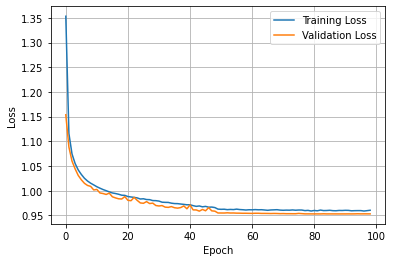

In [14]:
plt.figure()
plt.plot(epoch_number, loss, label='Training Loss')
plt.plot(epoch_number, val_loss,label='Validation Loss')
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.grid(True)
plt.legend(loc='upper right')
#plt.savefig('%s/efficiency_%ibit.jpg'%("/eos/user/a/arseksar/FP_plots",total_bit))
plt.savefig('%s/efficiency_FP'%("/eos/user/a/arseksar/FP_plots"))
plt.show()

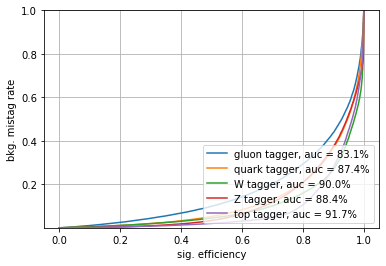

In [15]:
import pandas as pd
from sklearn.metrics import roc_curve, auc
df = pd.DataFrame()
fpr = {}
tpr = {}
auc1 = {}

plt.figure()
for i, label in enumerate(labels):
        df[label] = y_val[:,i]
        df[label + '_pred'] = predict_val[:,i]

        fpr[label], tpr[label], threshold = roc_curve(df[label],df[label+'_pred'])

        auc1[label] = auc(fpr[label], tpr[label])

        plt.plot(tpr[label],fpr[label],label='%s tagger, auc = %.1f%%'%(label,auc1[label]*100.))
plt.semilogy()
plt.xlabel("sig. efficiency")
plt.ylabel("bkg. mistag rate")
plt.ylim(0.000001,1)
plt.yscale('linear')
plt.grid(True)
plt.legend(loc='lower right')
#plt.savefig('%s/ROC_%ibit.jpg'%("/eos/user/a/arseksar/allincluded_quantized_plots",total_bit))
plt.savefig('%s/ROC_FP.jpg'%("/eos/user/a/arseksar/FP_plots"))
plt.show()

In [16]:
#with open('ROCAUC_Garnet_nconst_8_nbits_'+'%i'%(total_bit)+'.csv', 'w') as file:
with open('ROCAUC_Garnet_nconst_8_nbits_FP.csv', 'w') as file:
  header = labels[0]+', '+labels[1]+', '+labels[2]+', '+labels[3]+', '+labels[4]+'\n'
  file.write(header)
  rocauc = str(auc1[labels[0]])+','+str(auc1[labels[1]])+', '+str(auc1[labels[2]])+', '+str(auc1[labels[3]])+', '+str(auc1[labels[4]])
  file.write(rocauc)

In [17]:
model = 'GarNet'

labels = ['gluon', 'quark', 'W', 'Z', 'top']

In [18]:
#with open('performance_garnet_nconst_8_nbits_'+'%i'%(total_bit)+'.csv', 'w') as file:
with open('performance_garnet_nconst_8_nbits_FP.csv', 'w') as file:
    file.write("model,label,treshold,tpr,fpr\n")
    for label in labels:
     for t in [0.3, 0.5, 0.8]:
       index = np.argmax(tpr[label]>t)
       file.write( model+','+label+','+str(t)+','+str(tpr[label][index])+','+str(fpr[label][index])+'\n' )
       print("Label = ", label , " with treshold = ",t)
       print("TPR = ",tpr[label][index])
       print("FPR = ",fpr[label][index])
       print(" ")



Label =  gluon  with treshold =  0.3
TPR =  0.30007251354858405
FPR =  0.043815873138210754
 
Label =  gluon  with treshold =  0.5
TPR =  0.5000381650255705
FPR =  0.0991733944777356
 
Label =  gluon  with treshold =  0.8
TPR =  0.8000152660102282
FPR =  0.2934497774523594
 
Label =  quark  with treshold =  0.3
TPR =  0.30001188872156614
FPR =  0.019624687398583508
 
Label =  quark  with treshold =  0.5
TPR =  0.5000198145359436
FPR =  0.05218296012064983
 
Label =  quark  with treshold =  0.8
TPR =  0.8000118887215661
FPR =  0.2089943302216368
 
Label =  W  with treshold =  0.3
TPR =  0.3002584474011678
FPR =  0.019247707746733088
 
Label =  W  with treshold =  0.5
TPR =  0.5000670048817842
FPR =  0.04483430799220273
 
Label =  W  with treshold =  0.8
TPR =  0.8000191442519383
FPR =  0.15900656992274925
 
Label =  Z  with treshold =  0.3
TPR =  0.3000497150942675
FPR =  0.009407709121722467
 
Label =  Z  with treshold =  0.5
TPR =  0.5000382423802058
FPR =  0.033663614216521746
 
Labe

In [19]:
#files = [ '/eos/user/a/arseksar/SWAN_projects/GNN/performance_garnet_nconst_8_nbits_'+'%i'%(total_bit)+ '.csv']
files = [ '/eos/user/a/arseksar/SWAN_projects/GNN_paper/performance_garnet_nconst_8_nbits_'+ 'FP' + '.csv']
dfs = [ pd.read_csv(f) for f in files ]
data = pd.concat(dfs, ignore_index=True) 
print("header = ", data.keys())


header =  Index(['model', 'label', 'treshold', 'tpr', 'fpr'], dtype='object')


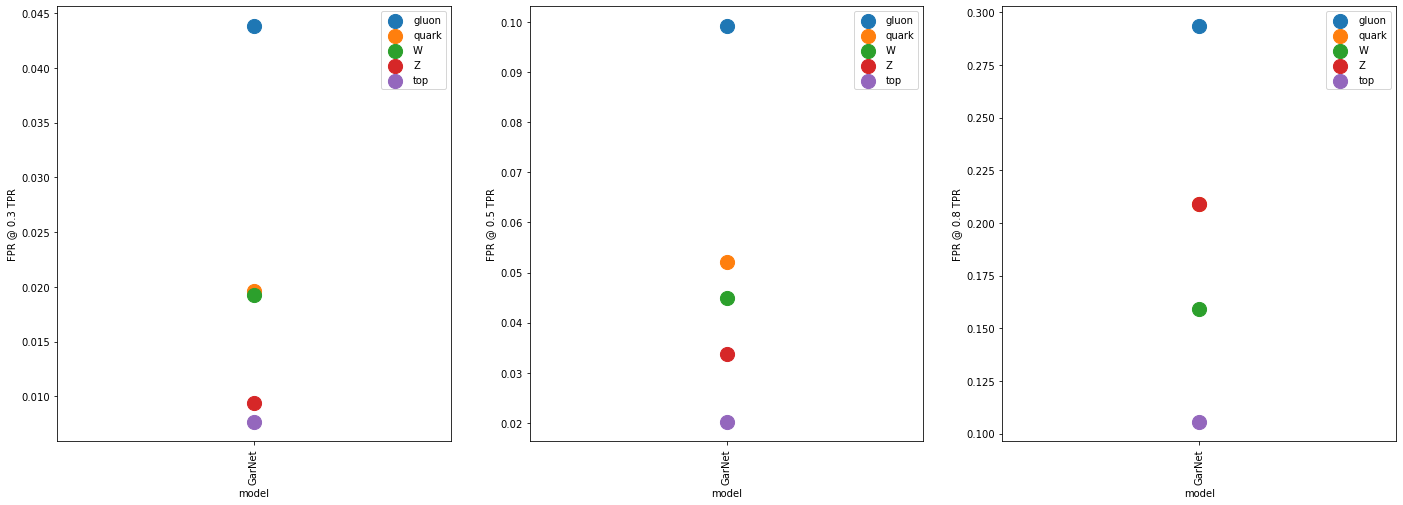

In [20]:
def plot(df,ax,t):
  labels = list( set( df['label'] ) )
  models = list( set( df['model'] ) )
  nmodels = len(models) 
  for m,model in enumerate(models):
    plt.gca().set_prop_cycle(None)
    for label in labels:
      if (m==0):
        ax.scatter( m , df['fpr'][ df['label']==label ][ df['model']==model ], marker='o',s=200,label=label)  
      else:
        ax.scatter( m , df['fpr'][ df['label']==label ][ df['model']==model ], marker='o',s=200)  


  ax.xaxis.set_ticks( np.arange(nmodels)  )
  ax.xaxis.set_ticklabels( models, rotation=90 )
  ax.legend(loc="upper right")
  plt.xlabel("model")
  plt.ylabel("FPR @ "+str(t)+" TPR")


treshs  = list( set( data['treshold'] ) )
plt.figure(figsize=(24,8))
#fig, axx = plt.subplots()
for i,t in enumerate(treshs):
    dat = data[ data['treshold']==t ]
    ax = plt.subplot(1, 3, i+1)
    plot(dat,ax,t)

(array([0., 1.]), array([207596,  52404]))
(array([0., 1.]), array([209532,  50468]))
(array([0., 1.]), array([207765,  52235]))
(array([0., 1.]), array([207702,  52298]))
(array([0., 1.]), array([207405,  52595]))


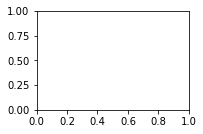

In [21]:
labels = ['gluon', 'quark', 'W', 'Z', 'top']
fpr = {}
tpr = {}
auc1 = {}
precision = {}
recall = {}
NN = {}
NP = {}
TP = {}
FP = {}
TN = {}
FN = {}
tresholds = {}

# Model Prediction
#Y_predict = model.predict(X_test)

# Loop over classes(labels) to get metrics per class and plots
ax = plt.subplot(2, 2, 3)
for i, label in enumerate(labels):
    fpr[label], tpr[label], tresholds[label] = roc_curve(y_val[:,i], predict_val[:,i])
#    precision[label], recall[label], tresholds = precision_recall_curve(Y_test[:,i], Y_predict[:,i]) 
    print( np.unique(y_val[:,i], return_counts=True) )
    _ , N = np.unique(y_val[:,i], return_counts=True) # count the NEGATIVES and POSITIVES samples in your test set
    NN[label] = N[0]                   # number of NEGATIVES 
    NP[label] = N[1]                   # number of POSITIVES
    TP[label] = tpr[label]*NP[label]
    FP[label] = fpr[label]*NN[label] 
    TN[label] = NN[label] - FP[label]
    FN[label] = NP[label] - TP[label]

In [25]:
# Save NN Accuracy for treshold of 0.5 for each label and the average over all classes
acc_avg = float(accuracy_score (np.argmax(y_val,axis=1), np.argmax(predict_val,axis=1)))
#with open('ACCURACY_' + '%i'%(total_bit) + '.csv', 'w') as file:
with open('ACCURACY_FP'+'.csv', 'w') as file:
  header = labels[0]+', '+labels[1]+', '+labels[2]+', '+labels[3]+', '+labels[4]+', '+'acc_avg'+'\n'
  file.write(header)
  accuracy = ''
  for label in labels:  
    idx = np.argmax( tresholds[label] <= 0.5 )
    accuracy += str( (TP[label][idx]+TN[label][idx])/(NP[label]+NN[label]) )+', '
  accuracy += str(acc_avg) 
  print (accuracy)
  file.write(accuracy)


0.8249615384615384, 0.8610192307692308, 0.8672538461538462, 0.8730269230769231, 0.9010269230769231, 0.6390576923076923
